Following a recent [Lindy Hop](https://www.youtube.com/watch?v=tCc6ft3xmPs) class, I'm now interesting in bouncing off the ground with my feet.

But what is bouncing? How does it work? And, most importantly, what are its equations? Follow me into the world of elastic collisions.

# What are we talking about?

I'd like to formulate the bouncing problem in terms of a simple analogy: the movement of a ball that falls on the ground and bounces off from it.

# The mathematics of bouncing: a falling ball

We consider our ball to have a mass $m$, a (two-dimensional) position vector $\vec{x}$, speed $\vec{v} = \vec{\dot{x}}$. Let's suppose the ball is on earth and gravity applies. We can thus write:

$$m \frac{d \vec{v}}{dt} = m \vec{g}$$

Gravity is constant and thus we can integrate twice to get the following formula:

$$
\vec{x} = \frac{1}{2}\vec{g}t^2 + \vec{v_0}t + \vec{x_0}
$$

This is already interesting, as this equation describes the trajectory of a cannon ball when friction is negligible, or a thrown rock, a basketball and numerous other things. Let's implement this.

In [47]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [57]:
def plot_trajectory(x_0, v_0, t_min, t_max):
    t = np.linspace(t_min, t_max)
    x = 1/2. * 9.81 * np.array([0, -1.])[:, np.newaxis] * t**2 + v_0[:, np.newaxis] * t + x_0[:, np.newaxis]
    plt.plot(x[0, :], x[1, :], '-o')
    plt.plot(x[0, 0], x[1, 0], 'or', ms=15)
    plt.xlabel('x (m)')
    plt.ylabel('y (m)')
    plt.title('trajectory over duration $\Delta t = {}$ seconds'.format(t_max - t_min))

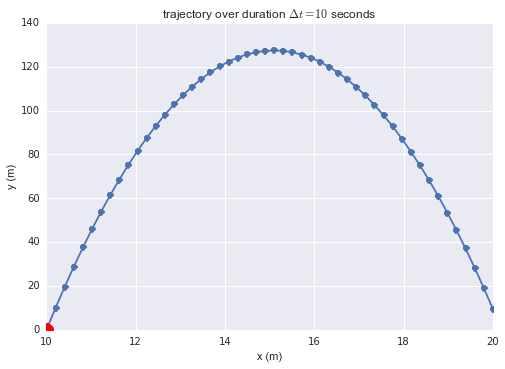

In [58]:
plot_trajectory(x_0=np.array([10, 0]),
                v_0=np.array([1, 50]),
                t_min=0, 
                t_max=10)

This seems to work, let's see what happens if we make it interactive.

In [50]:
from IPython.html.widgets import interact

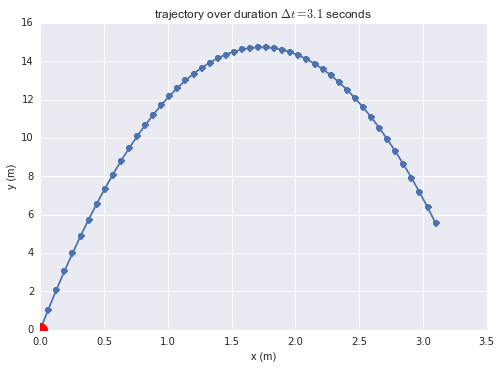

In [60]:
interact(lambda v_0x, v_0y, t_max: plot_trajectory(np.array([0., 0.]), np.array([v_0x, v_0y]), 0, t_max),
         v_0x=(-50, 50), 
         v_0y=(-50, 50), 
         t_max=(0, 20, 0.1))

NameError: name 'initialize_centroids' is not defined

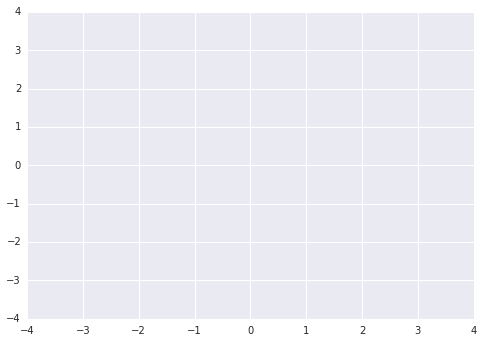

In [52]:
from JSAnimation import IPython_display
from matplotlib import animation

# create a simple animation
fig = plt.figure()
ax = plt.axes(xlim=(-4, 4), ylim=(-4, 4))
centroids = initialize_centroids(points, 3)

def init():
    return

def animate(i):
    global centroids
    closest = closest_centroid(points, centroids)
    centroids = move_centroids(points, closest, centroids)
    ax.cla()
    ax.scatter(points[:, 0], points[:, 1], c=closest)
    ax.scatter(centroids[:, 0], centroids[:, 1], c='r', s=100)
    return 

animation.FuncAnimation(fig, animate, init_func=init,
                        frames=10, interval=200, blit=True)

# Adding an elastic collision to create a bouncing effect 

Wikipedia reference [https://en.wikipedia.org/wiki/Elastic_collision](https://en.wikipedia.org/wiki/Elastic_collision)

The ground is considered to have an infinite mass so the formula becomes....

What about the energy? Is it conserved? It should, right?